#### Load libraries

In [1]:
import pandas as pd
import numpy as np

from scripts.data_inspection import DataInspector, DataTypesInspectionStrategy, HeadInspectionStrategy, SummaryStatisticsInspectionStrategy
from scripts.preprocessing import PreProcessor, DataTypesConversionStrategy, SubstringReplacementStrategy, FullStringReplacementStrategy
from scripts.missing_values_analysis import SimpleMissingValuesAnalysis
from scripts.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from scripts.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis
from scripts.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#### Load data

In [2]:
# Load the raw data

data_path = '../data/raw_data.csv'
df = pd.read_csv(data_path)

### PREPROCESSING

#### Step 1: Data Inspection

In [3]:
# Inspect data types
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   company_uuid              100 non-null    object
 1   transaction_uuid          100 non-null    object
 2   mode                      100 non-null    object
 3   amount                    100 non-null    object
 4   entry_time                100 non-null    object
 5   paid_at                   100 non-null    object
 6   vendor_uuid               100 non-null    object
 7   status                    100 non-null    object
 8   card_uuid                 97 non-null     object
 9   card_time_of_addition     97 non-null     object
 10  user_uuid                 97 non-null     object
 11  kyc_status                97 non-null     object
 12  user_aadhar_name          97 non-null     object
 13  vendor_display_name       100 non-null    object

In [4]:
# View first few rows of data
data_inspector.set_strategy(HeadInspectionStrategy())
data_inspector.execute_inspection(df)

                           company_uuid                      transaction_uuid  \
0  01065873-3d25-430e-8c23-368a777b58b0  a6f44453-6f30-44fb-8c53-66b0aa7d3ede   
1  01065873-3d25-430e-8c23-368a777b58b0  38943bff-4f1e-4df7-aa7b-20f163b3d229   
2  01065873-3d25-430e-8c23-368a777b58b0  a8a7db95-39eb-42da-b1be-3bcb199287cb   
3  01065873-3d25-430e-8c23-368a777b58b0  8a82b884-13b7-4504-b213-f7084b4aff19   
4  01065873-3d25-430e-8c23-368a777b58b0  03c2988f-2517-4c8a-8a21-aa9f74ad7eba   
5  01065873-3d25-430e-8c23-368a777b58b0  bf1ff4a8-7987-44ea-b8ef-b922d62f8b85   
6  01065873-3d25-430e-8c23-368a777b58b0  55cf561b-4451-4a4f-be65-6d993d33c333   
7  01065873-3d25-430e-8c23-368a777b58b0  e1470cdd-4e37-4791-99a3-409ef8dfa934   
8  01065873-3d25-430e-8c23-368a777b58b0  b1ca1b0c-9c12-46d2-ac8d-a9a9973fa49a   
9  01065873-3d25-430e-8c23-368a777b58b0  4703082c-8206-4cf5-b67a-4528250e6b45   

          mode  amount               entry_time                  paid_at  \
0  credit_card   2,300    May 15

#### Step 2: Type Conversion

In [5]:
# Remove commas from amount column
preprocessor = PreProcessor(SubstringReplacementStrategy('amount', ',',''))
df = preprocessor.execute(df)

In [6]:
# Replace NaN and blank string values with None
for col in df.columns:
    if pd.api.types.is_object_dtype(df[col]):
        
        preprocessor.set_strategy(FullStringReplacementStrategy(col, np.nan, None))
        df = preprocessor.execute(df)
        
        preprocessor.set_strategy(FullStringReplacementStrategy(col, '', None))
        df = preprocessor.execute(df)

In [7]:
# Type cast each column to the appropriate data type
int_cols = []
float_cols = ['amount']
str_cols = ['user_aadhar_name', 'vendor_display_name', 'vendor_bank_account_name', 'vendor_gst_name', 'vendor_pan_name', 'vendor_gst_trade_name', 'user_pan_name', 'user_gst_name']
obj_cols = ['company_uuid', 'transaction_uuid', 'mode', 'vendor_uuid', 'status', 'card_uuid', 'user_uuid', 'kyc_status', 'vendor_status', 'fradulent_user_flag']
timestamp_cols = ['entry_time', 'paid_at', 'card_time_of_addition', 'vendor_addition_date']

preprocessor.set_strategy(DataTypesConversionStrategy(int, int_cols))
df = preprocessor.execute(df)

preprocessor.set_strategy(DataTypesConversionStrategy(float, float_cols))
df = preprocessor.execute(df)

preprocessor.set_strategy(DataTypesConversionStrategy(str, str_cols))
df = preprocessor.execute(df)

preprocessor.set_strategy(DataTypesConversionStrategy(object, obj_cols))
df = preprocessor.execute(df)

preprocessor.set_strategy(DataTypesConversionStrategy(pd.Timestamp, timestamp_cols))
df = preprocessor.execute(df)

In [8]:
# View data types post type conversion
data_inspector.set_strategy(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   company_uuid              100 non-null    object        
 1   transaction_uuid          100 non-null    object        
 2   mode                      100 non-null    object        
 3   amount                    100 non-null    float64       
 4   entry_time                100 non-null    datetime64[ns]
 5   paid_at                   100 non-null    datetime64[ns]
 6   vendor_uuid               100 non-null    object        
 7   status                    100 non-null    object        
 8   card_uuid                 97 non-null     object        
 9   card_time_of_addition     97 non-null     datetime64[ns]
 10  user_uuid                 97 non-null     object        
 11  kyc_status                97 non-null     object    

In [9]:
# Inspect summary statistics
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
             amount                     entry_time  \
count     100.00000                            100   
mean    42244.68000  2024-03-18 07:26:29.399999488   
min         1.00000            2023-08-21 13:19:00   
25%      5000.00000            2024-02-26 13:23:45   
50%     20000.00000            2024-03-25 20:50:00   
75%     50000.00000            2024-05-14 20:36:15   
max    260000.00000            2024-06-29 13:23:00   
std     57248.54291                            NaN   

                             paid_at          card_time_of_addition  \
count                            100                             97   
mean   2024-03-18 07:26:29.399999488  2024-01-27 23:49:28.453608448   
min              2023-08-21 13:19:00            2023-08-21 13:19:00   
25%              2024-02-26 13:23:45            2024-01-12 06:55:00   
50%              2024-03-25 20:50:00            2024-02-03 05:26:00   
75%              2024-05-14 20:36:15         

### EXPLORATORY ANALYSIS

#### Step 1: Missing Values Assessment


Missing Values Count by Column:
card_uuid                 3
card_time_of_addition     3
user_uuid                 3
kyc_status                3
user_aadhar_name          3
vendor_gst_name          77
vendor_pan_name          26
vendor_gst_trade_name    84
user_pan_name            42
user_gst_name            47
dtype: int64

Visualizing Missing Values...


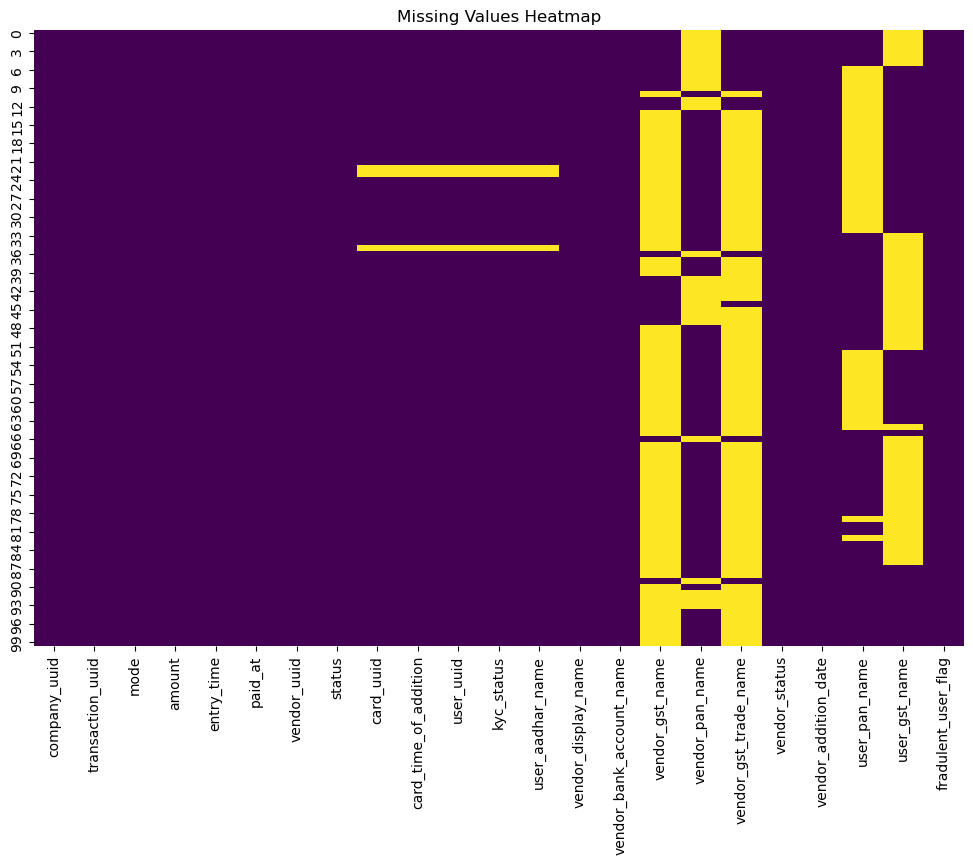

In [10]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

#### Step 2: Univariate Analysis

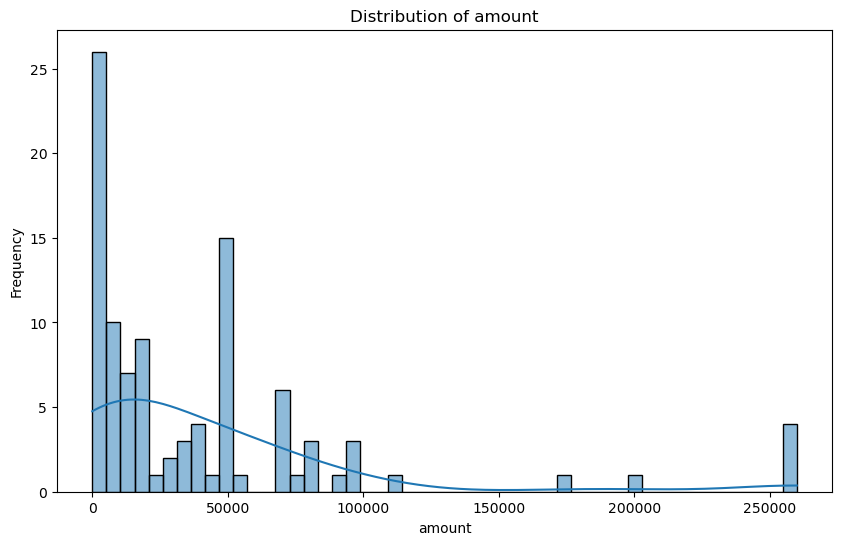

In [11]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'amount')

In [ ]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'vendor_status')


NameError: name 'univariate_analyzer' is not defined

#### Step 3: Bivariate Analysis

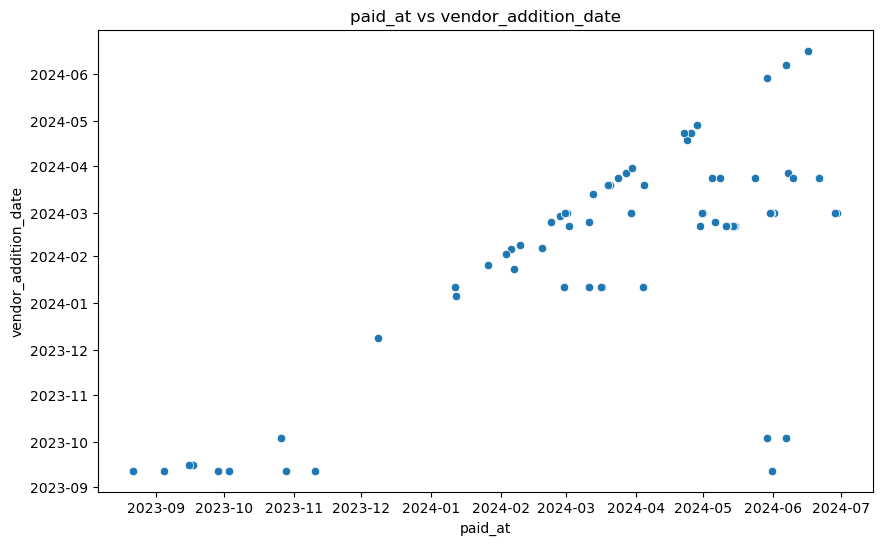

In [14]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'paid_at', 'vendor_addition_date')


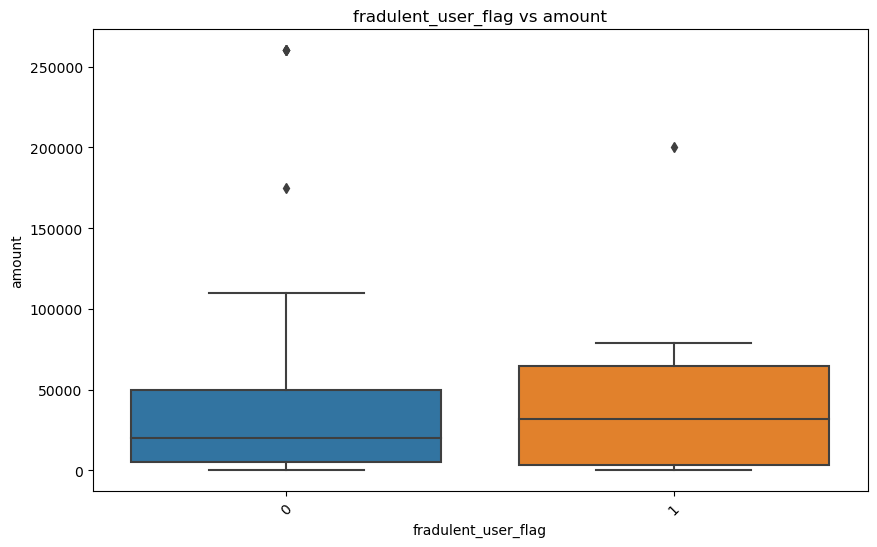

In [15]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'fradulent_user_flag', 'amount')

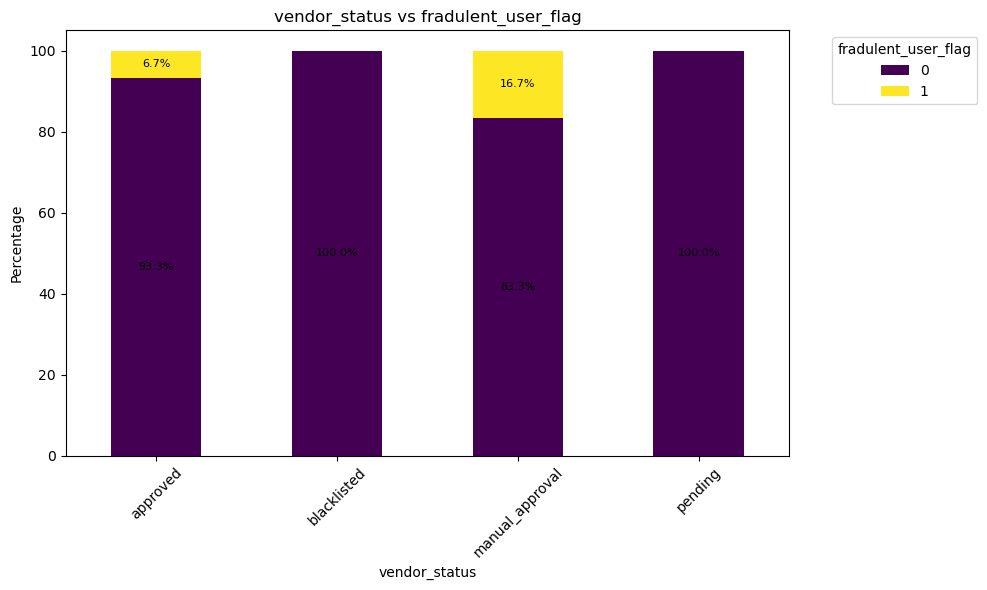

In [16]:
# Analyzing the relationship between two categorical features
bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'vendor_status', 'fradulent_user_flag')

#### Step 4: Multivariate Analysis

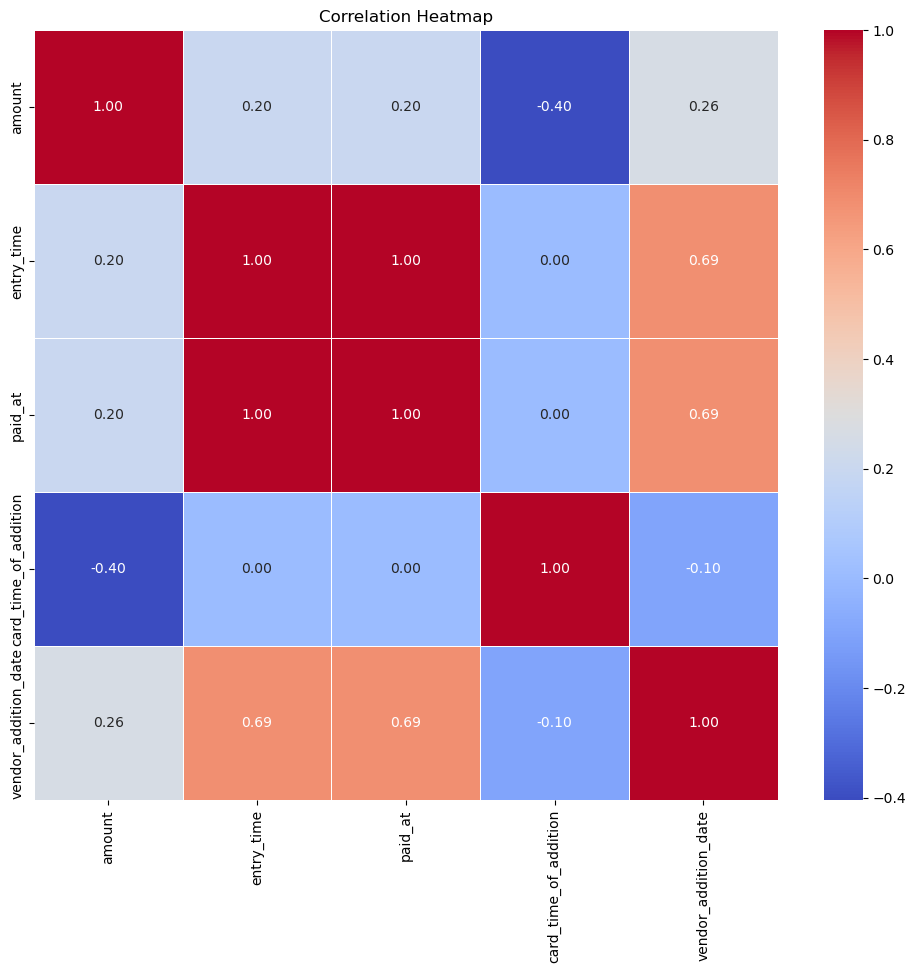

c:\Users\nanda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


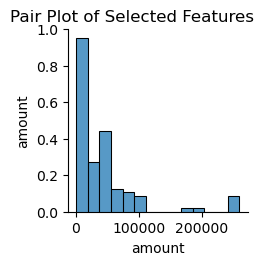

In [17]:

# Perform Multivariate Analysis

multivariate_analyzer = SimpleMultivariateAnalysis()

# Select numerical features for the analysis
selected_features = df[['amount', 'entry_time', 'paid_at', 'card_time_of_addition', 'vendor_addition_date']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)
